## Load Data and Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import matplotlib.image as mpimg
from itertools import chain
from random import sample 

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
60944,00015041_011.png,Consolidation|Effusion,11,15041,33,M,AP,2500,2048,0.168,0.168,NaN
14131,00003659_009.png,No Finding,9,3659,51,F,PA,2048,2500,0.168,0.168,NaN
55092,00013798_002.png,No Finding,2,13798,21,F,AP,2048,2500,0.168,0.168,NaN


In [3]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))

In [4]:
all_labels = [x for x in all_labels if len(x)>0]

In [5]:
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
65373,00016142_021.png,Infiltration,21,16142,16,M,PA,2992,2989,0.143000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32033,00008376_000.png,Pneumothorax,0,8376,68,F,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75142,00018435_001.png,No Finding,1,18435,54,M,PA,2021,2021,0.194311,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
all_xray_df=all_xray_df[(all_xray_df['Patient Age']<100)&(all_xray_df['Patient Age']>10)]

## The patient demographic data such as gender, age, patient position,etc.

(array([ 2106.,  2830.,  4654.,  5066.,  6092.,  8148.,  6714.,  7676.,
         9376., 10201., 13689., 10225.,  8367.,  6088.,  3772.,  2544.,
          855.,   323.,   151.,    35.]),
 array([11. , 15.2, 19.4, 23.6, 27.8, 32. , 36.2, 40.4, 44.6, 48.8, 53. ,
        57.2, 61.4, 65.6, 69.8, 74. , 78.2, 82.4, 86.6, 90.8, 95. ]),
 <a list of 20 Patch objects>)

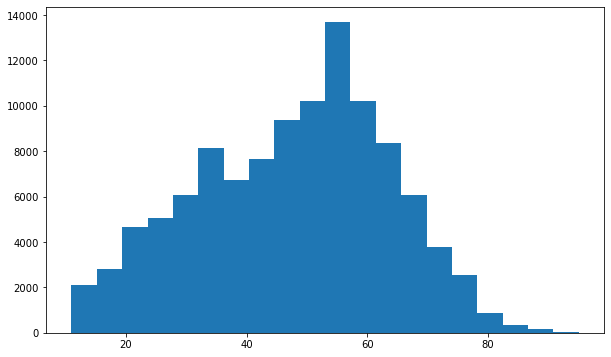

In [7]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==0]['Patient Age'],bins=20)

(array([ 32.,  43.,  56.,  93.,  71., 114.,  80.,  85., 107., 111., 109.,
        127., 109., 113.,  69.,  33.,  20.,  11.,   4.,   2.]),
 array([11.  , 14.95, 18.9 , 22.85, 26.8 , 30.75, 34.7 , 38.65, 42.6 ,
        46.55, 50.5 , 54.45, 58.4 , 62.35, 66.3 , 70.25, 74.2 , 78.15,
        82.1 , 86.05, 90.  ]),
 <a list of 20 Patch objects>)

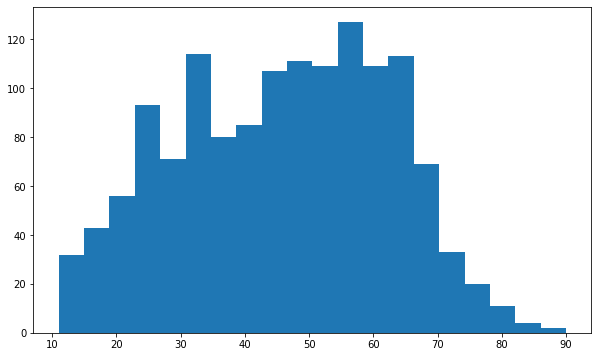

In [8]:
plt.figure(figsize=(10,6))
plt.hist(all_xray_df[all_xray_df.Pneumonia==1]['Patient Age'],bins=20)

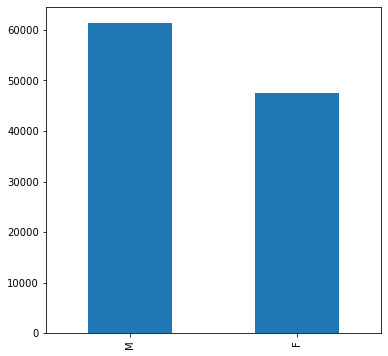

In [9]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia==0]['Patient Gender'].value_counts().plot(kind='bar')

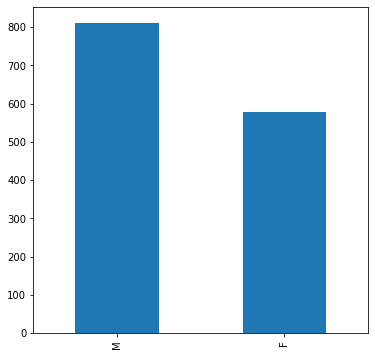

In [10]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia==1]['Patient Gender'].value_counts().plot(kind='bar')

## The x-ray views taken (i.e. view position)

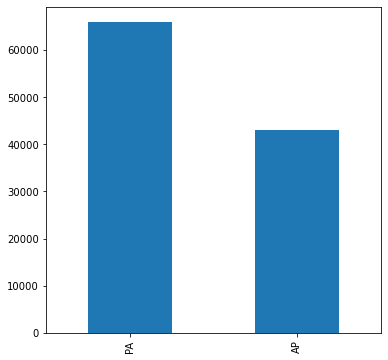

In [11]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia==0]['View Position'].value_counts().plot(kind='bar')

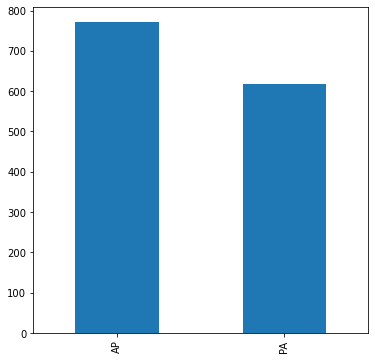

In [12]:
plt.figure(figsize=(6,6))
all_xray_df[all_xray_df.Pneumonia==1]['View Position'].value_counts().plot(kind='bar')

## The number of cases including number of pneumonia cases and number of non-pneumonia cases

[Text(0, 0.5, 'Number of Images with Label')]

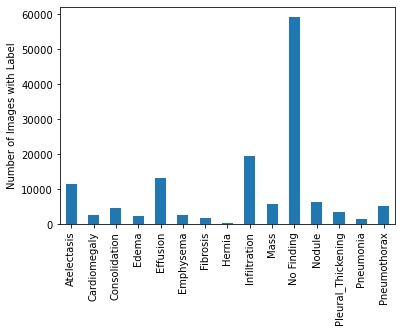

In [13]:
ax = all_xray_df[all_labels].sum().plot(kind='bar')
ax.set(ylabel = 'Number of Images with Label')

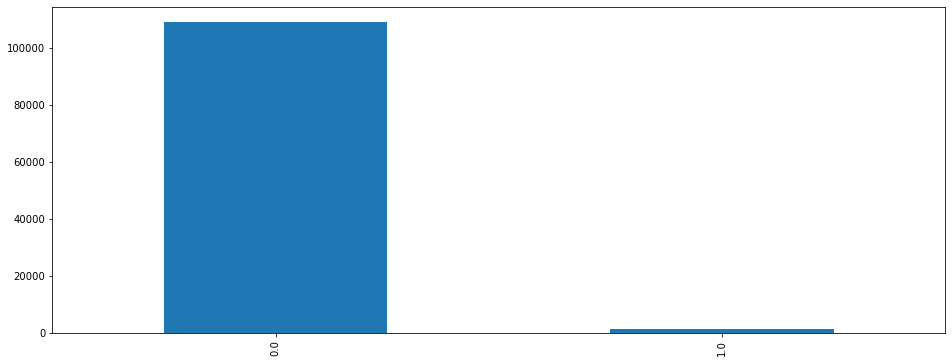

In [14]:
plt.figure(figsize=(16,6))
all_xray_df['Pneumonia'].value_counts()[0:30].plot(kind='bar')

In [15]:
Pneumonia_rate=len(all_xray_df[all_xray_df['Pneumonia']==1])/len(all_xray_df)
Pneumonia_rate

0.012592814208393397

## The distribution of other diseases that are comorbid with pneumonia 

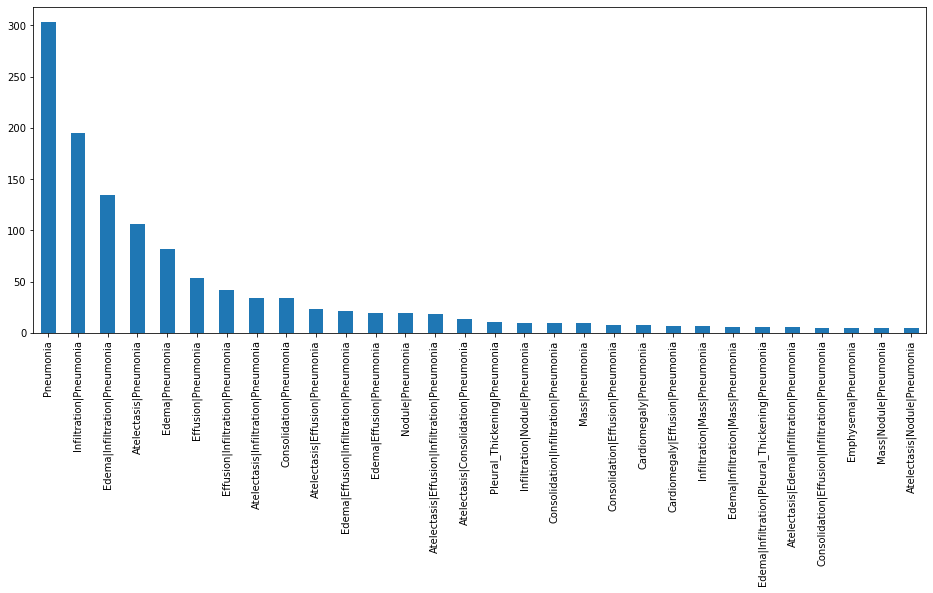

In [16]:
##Since there are many combinations of potential findings, I'm going to look at the 30 most common co-occurrences:
plt.figure(figsize=(16,6))
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

## Number of disease per patient

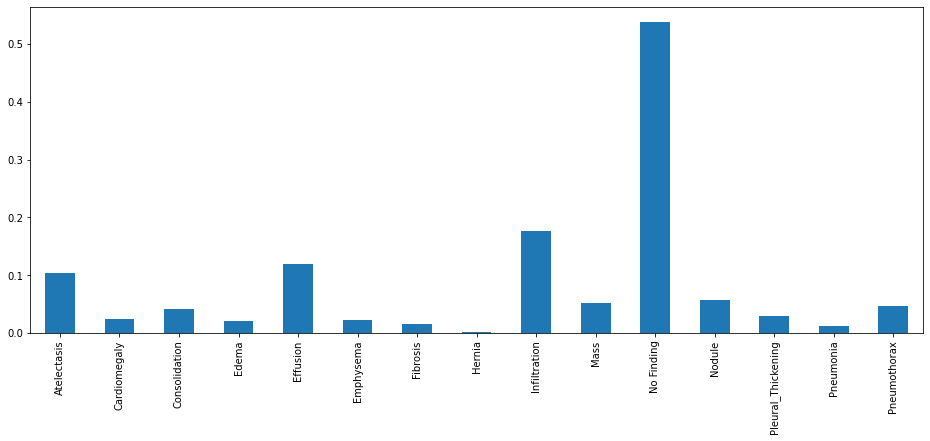

In [17]:
plt.figure(figsize=(16,6))
(all_xray_df[all_labels].sum()/len(all_xray_df)).plot(kind='bar')

## Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

In [18]:
## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2527,00012687_011.png,Pneumothorax,11,12687,063Y,F,PA,2992,2991,0.143,0.143
1163,00006180_001.png,Infiltration,1,6180,006Y,F,PA,2048,2500,0.168,0.168
3751,00018394_001.png,No Finding,1,18394,057Y,F,PA,2992,2991,0.143,0.143


In [19]:
all_labels = np.unique(list(chain(*sample_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        sample_df[c_label] = sample_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
sample_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
3314,00016399_018.png,Infiltration|Nodule,18,16399,056Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1697,00008841_051.png,Mass,51,8841,051Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
484,00002529_020.png,Infiltration,20,2529,018Y,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
images_paths={}
for label in all_labels:
    if label=='Pneumonia':
        images_paths[label]=[glob(os.path.join("/data","images*","*",img_id))[0] for img_id in sample_df[sample_df[label]==1]['Image Index']]
    else:
        images_paths['non_Pneumonia']=[glob(os.path.join("/data","images*","*",img_id))[0] for img_id in sample_df[sample_df[label]==1]['Image Index']]
    

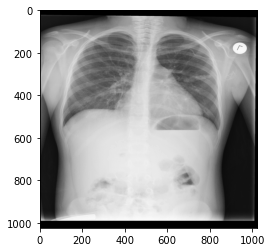

In [21]:
example_Pneumonia=images_paths['Pneumonia'][2]
img_Pneumonia = io.imread(example_Pneumonia)
plt.imshow(img_Pneumonia,cmap='gray')

(array([7.3927e+04, 4.0000e+00, 3.2000e+01, 4.6000e+01, 1.6100e+02,
        9.0000e+01, 1.3000e+02, 4.1000e+01, 3.7000e+01, 7.1000e+01,
        2.6400e+02, 2.3300e+02, 1.2220e+03, 2.4770e+03, 4.1520e+03,
        5.2320e+03, 9.5230e+03, 2.3766e+04, 1.6800e+04, 8.2710e+03,
        7.7750e+03, 9.9350e+03, 7.0840e+03, 3.9180e+03, 2.6160e+03,
        2.3900e+03, 1.6650e+03, 1.2210e+03, 1.1040e+03, 1.0820e+03,
        9.3900e+02, 1.0020e+03, 9.7700e+02, 9.5700e+02, 9.4600e+02,
        9.9200e+02, 9.6100e+02, 1.0490e+03, 9.5200e+02, 9.6700e+02,
        1.0090e+03, 1.0290e+03, 1.0520e+03, 1.0570e+03, 1.1080e+03,
        1.0780e+03, 1.0760e+03, 1.1120e+03, 1.0800e+03, 1.1300e+03,
        9.8300e+02, 0.0000e+00, 1.0650e+03, 1.1020e+03, 1.0430e+03,
        1.0560e+03, 9.8900e+02, 1.0010e+03, 1.0410e+03, 1.0480e+03,
        1.0850e+03, 1.1630e+03, 1.2230e+03, 1.2460e+03, 1.2800e+03,
        1.3810e+03, 1.4570e+03, 1.4610e+03, 1.5430e+03, 1.6050e+03,
        1.6850e+03, 1.6910e+03, 1.8290e+03, 1.92

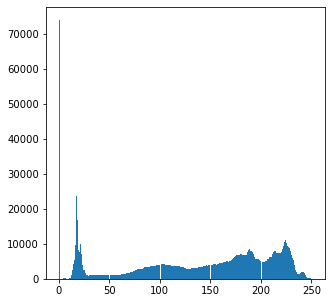

In [22]:
plt.figure(figsize=(5,5))
plt.hist(img_Pneumonia.ravel(), bins = 256)

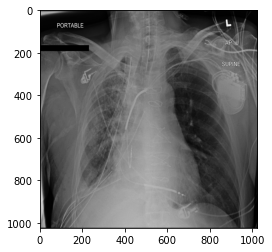

In [23]:
example_non_Pneumonia=images_paths['non_Pneumonia'][0]
img_non_Pneumonia = io.imread(example_non_Pneumonia)
plt.imshow(img_non_Pneumonia,cmap='gray')

(array([8.0060e+03, 2.6750e+03, 9.3870e+03, 5.7800e+03, 8.4970e+03,
        4.8420e+03, 2.9400e+03, 2.6620e+03, 2.4830e+03, 2.3340e+03,
        2.3470e+03, 2.1130e+03, 1.9990e+03, 1.8000e+03, 1.8150e+03,
        1.8920e+03, 2.1080e+03, 1.9840e+03, 2.2790e+03, 2.5660e+03,
        2.7810e+03, 3.0020e+03, 3.1660e+03, 3.3690e+03, 3.6240e+03,
        3.5080e+03, 3.5220e+03, 3.8180e+03, 3.7190e+03, 3.9750e+03,
        4.1590e+03, 4.2630e+03, 4.4090e+03, 4.6070e+03, 4.7100e+03,
        4.9760e+03, 5.1290e+03, 5.1750e+03, 5.1480e+03, 5.1240e+03,
        4.9830e+03, 4.9170e+03, 4.8480e+03, 4.7830e+03, 4.8350e+03,
        4.8060e+03, 4.8580e+03, 4.6920e+03, 4.5850e+03, 4.3910e+03,
        4.3930e+03, 4.3860e+03, 4.3240e+03, 4.3620e+03, 4.1790e+03,
        4.2860e+03, 4.2930e+03, 4.3430e+03, 4.4170e+03, 4.7170e+03,
        4.7860e+03, 4.9150e+03, 4.9270e+03, 5.0610e+03, 5.1120e+03,
        5.0040e+03, 5.0820e+03, 5.4980e+03, 5.7430e+03, 6.1370e+03,
        6.4180e+03, 6.7260e+03, 6.7950e+03, 6.86

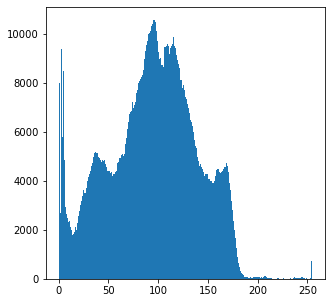

In [24]:
plt.figure(figsize=(5,5))
plt.hist(img_non_Pneumonia.ravel(), bins = 256)

In [25]:
def standerdization(img):
    mean_intensity = np.mean(img)
    std_intensity = np.std(img)
    new_img = img.copy()
    new_img = (new_img - mean_intensity)/std_intensity
    return new_img

In [26]:
new_img_Pneumonia=standerdization(img_Pneumonia)

(array([7.3927e+04, 4.0000e+00, 3.2000e+01, 4.6000e+01, 1.6100e+02,
        9.0000e+01, 1.3000e+02, 4.1000e+01, 3.7000e+01, 7.1000e+01,
        2.6400e+02, 2.3300e+02, 1.2220e+03, 2.4770e+03, 4.1520e+03,
        5.2320e+03, 9.5230e+03, 2.3766e+04, 1.6800e+04, 8.2710e+03,
        7.7750e+03, 9.9350e+03, 7.0840e+03, 3.9180e+03, 2.6160e+03,
        2.3900e+03, 1.6650e+03, 1.2210e+03, 1.1040e+03, 1.0820e+03,
        9.3900e+02, 1.0020e+03, 9.7700e+02, 9.5700e+02, 9.4600e+02,
        9.9200e+02, 9.6100e+02, 1.0490e+03, 9.5200e+02, 9.6700e+02,
        1.0090e+03, 1.0290e+03, 1.0520e+03, 1.0570e+03, 1.1080e+03,
        1.0780e+03, 1.0760e+03, 1.1120e+03, 1.0800e+03, 1.1300e+03,
        9.8300e+02, 0.0000e+00, 1.0650e+03, 1.1020e+03, 1.0430e+03,
        1.0560e+03, 9.8900e+02, 1.0010e+03, 1.0410e+03, 1.0480e+03,
        1.0850e+03, 1.1630e+03, 1.2230e+03, 1.2460e+03, 1.2800e+03,
        1.3810e+03, 1.4570e+03, 1.4610e+03, 1.5430e+03, 1.6050e+03,
        1.6850e+03, 1.6910e+03, 1.8290e+03, 1.92

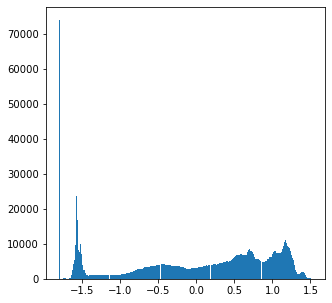

In [27]:
plt.figure(figsize=(5,5))
plt.hist(new_img_Pneumonia.ravel(), bins = 256)

In [28]:
img_non_Pneumonia=standerdization(img_non_Pneumonia)

(array([8.0060e+03, 2.6750e+03, 9.3870e+03, 5.7800e+03, 8.4970e+03,
        4.8420e+03, 2.9400e+03, 2.6620e+03, 2.4830e+03, 2.3340e+03,
        2.3470e+03, 2.1130e+03, 1.9990e+03, 1.8000e+03, 1.8150e+03,
        1.8920e+03, 2.1080e+03, 1.9840e+03, 2.2790e+03, 2.5660e+03,
        2.7810e+03, 3.0020e+03, 3.1660e+03, 3.3690e+03, 3.6240e+03,
        3.5080e+03, 3.5220e+03, 3.8180e+03, 3.7190e+03, 3.9750e+03,
        4.1590e+03, 4.2630e+03, 4.4090e+03, 4.6070e+03, 4.7100e+03,
        4.9760e+03, 5.1290e+03, 5.1750e+03, 5.1480e+03, 5.1240e+03,
        4.9830e+03, 4.9170e+03, 4.8480e+03, 4.7830e+03, 4.8350e+03,
        4.8060e+03, 4.8580e+03, 4.6920e+03, 4.5850e+03, 4.3910e+03,
        4.3930e+03, 4.3860e+03, 4.3240e+03, 4.3620e+03, 4.1790e+03,
        4.2860e+03, 4.2930e+03, 4.3430e+03, 4.4170e+03, 4.7170e+03,
        4.7860e+03, 4.9150e+03, 4.9270e+03, 5.0610e+03, 5.1120e+03,
        5.0040e+03, 5.0820e+03, 5.4980e+03, 5.7430e+03, 6.1370e+03,
        6.4180e+03, 6.7260e+03, 6.7950e+03, 6.86

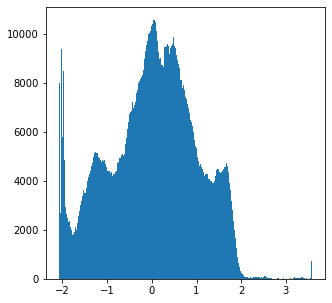

In [29]:
plt.figure(figsize=(5,5))
plt.hist(img_non_Pneumonia.ravel(), bins = 256)

## Conclusions

* The data is highly unblanced, where we only have 1.27% percent of images with Pneumonia
* The classes of Patient Gender and Patient Age are slightly imbalanced for images with Pneumonia and without Pneumonia
* Images with Pneumonia and without Pneumonia cannot classfied by Pixel-level threshold.